In [1]:


## 2. Import Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries imported successfully")

## 3. Data Collection
# Define JSE tickers
tickers = ['NPN.JO', 'MTN.JO', 'AGL.JO', 'SBK.JO', 'SOL.JO', 'FSR.JO']

# Company names for better readability
ticker_names = {
    'NPN.JO': 'Naspers',
    'MTN.JO': 'MTN Group',
    'AGL.JO': 'Anglo American',
    'SBK.JO': 'Standard Bank',
    'SOL.JO': 'Sasol',
    'FSR.JO': 'FirstRand'
}

# Set date range
start_date = '2019-01-01'
end_date = '2024-01-01'

print(f"📊 Downloading data for {len(tickers)} JSE stocks from {start_date} to {end_date}...")

# Download historical data with auto_adjust=False to get 'Adj Close'
prices = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)['Adj Close']



✅ Libraries imported successfully
📊 Downloading data for 6 JSE stocks from 2019-01-01 to 2024-01-01...


[*********************100%***********************]  6 of 6 completed


✅ Data downloaded successfully
📈 Data shape: (1249, 6)
📅 Date range: 2019-01-02 to 2023-12-29
📊 Number of trading days: 1249

First 5 rows of adjusted close prices:
            Anglo American    FirstRand    MTN Group       Naspers  \
Date                                                                 
2019-01-02    29983.515625  6312.161133  8679.084961  35012.960938   
2019-01-03    30043.062500  6436.690430  8618.231445  35063.253906   
2019-01-04    30233.402344  6500.449707  8708.014648  35874.148438   
2019-01-07    30414.964844  6463.588379  8727.965820  35475.617188   
2019-01-08    30586.759766  6475.544434  8629.205078  35647.601562   

            Standard Bank         Sasol  
Date                                     
2019-01-02   17487.867188  41682.046875  
2019-01-03   17773.638672  42824.457031  
2019-01-04   17995.687500  43111.058594  
2019-01-07   17824.419922  42444.984375  
2019-01-08   17922.001953  43014.191406  

Last 5 rows of adjusted close prices:
           

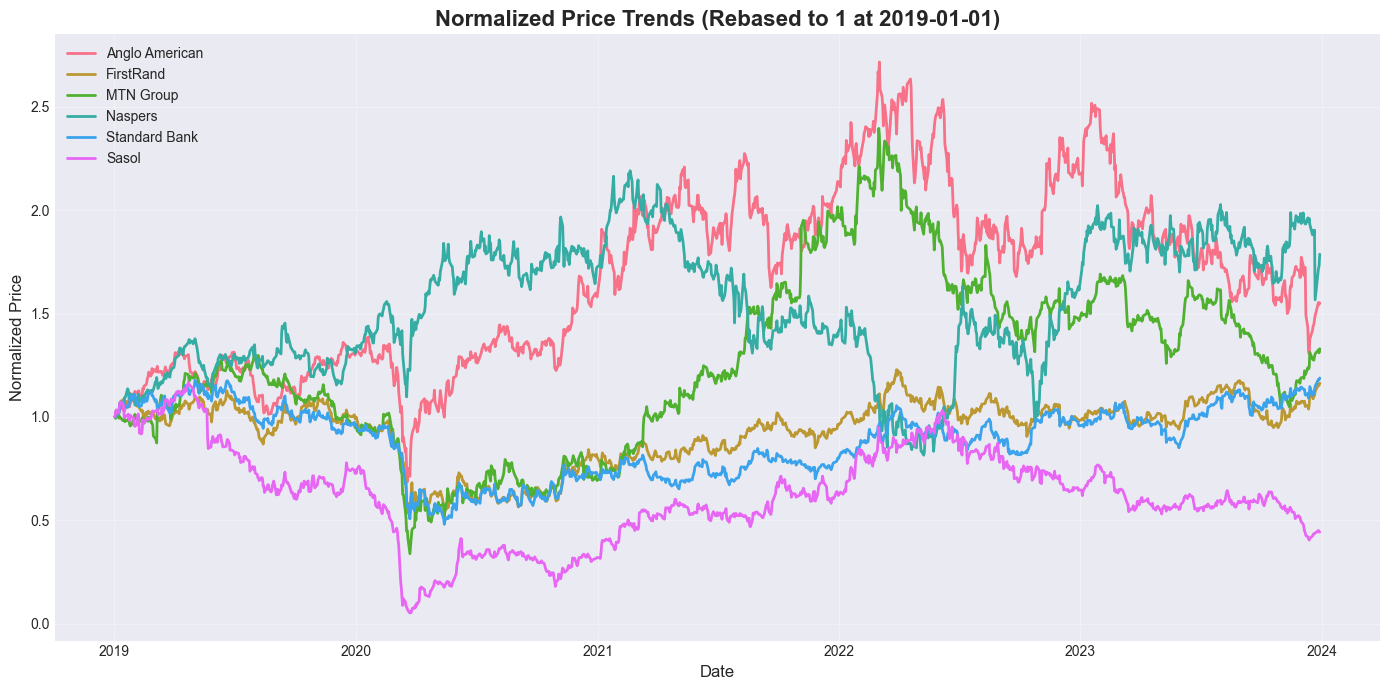

📊 First 5 rows of daily log returns:
            Anglo American  FirstRand  MTN Group   Naspers  Standard Bank  \
Date                                                                        
2019-01-03        0.001984   0.019536  -0.007036  0.001435       0.016209   
2019-01-04        0.006316   0.009857   0.010364  0.022863       0.012416   
2019-01-07        0.005987  -0.005687   0.002289 -0.011171      -0.009563   
2019-01-08        0.005632   0.001848  -0.011380  0.004836       0.005460   
2019-01-09        0.025210   0.026717   0.008633  0.047360       0.004490   

               Sasol  
Date                  
2019-01-03  0.027039  
2019-01-04  0.006670  
2019-01-07 -0.015571  
2019-01-08  0.013321  
2019-01-09  0.032570  

📈 Returns data covers: 2019-01-03 to 2023-12-29
📊 Number of return observations: 1248
DESCRIPTIVE STATISTICS OF DAILY LOG RETURNS
                 count    mean     std     min     25%     50%     75%  \
Anglo American  1248.0  0.0004  0.0253 -0.1429 -0.0128  0

<Figure size 1400x600 with 0 Axes>

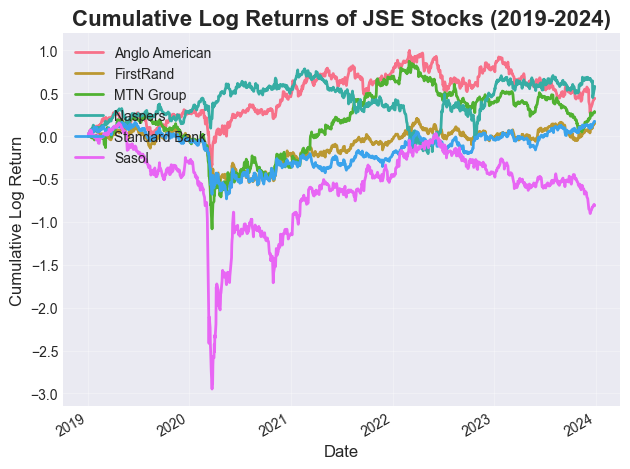

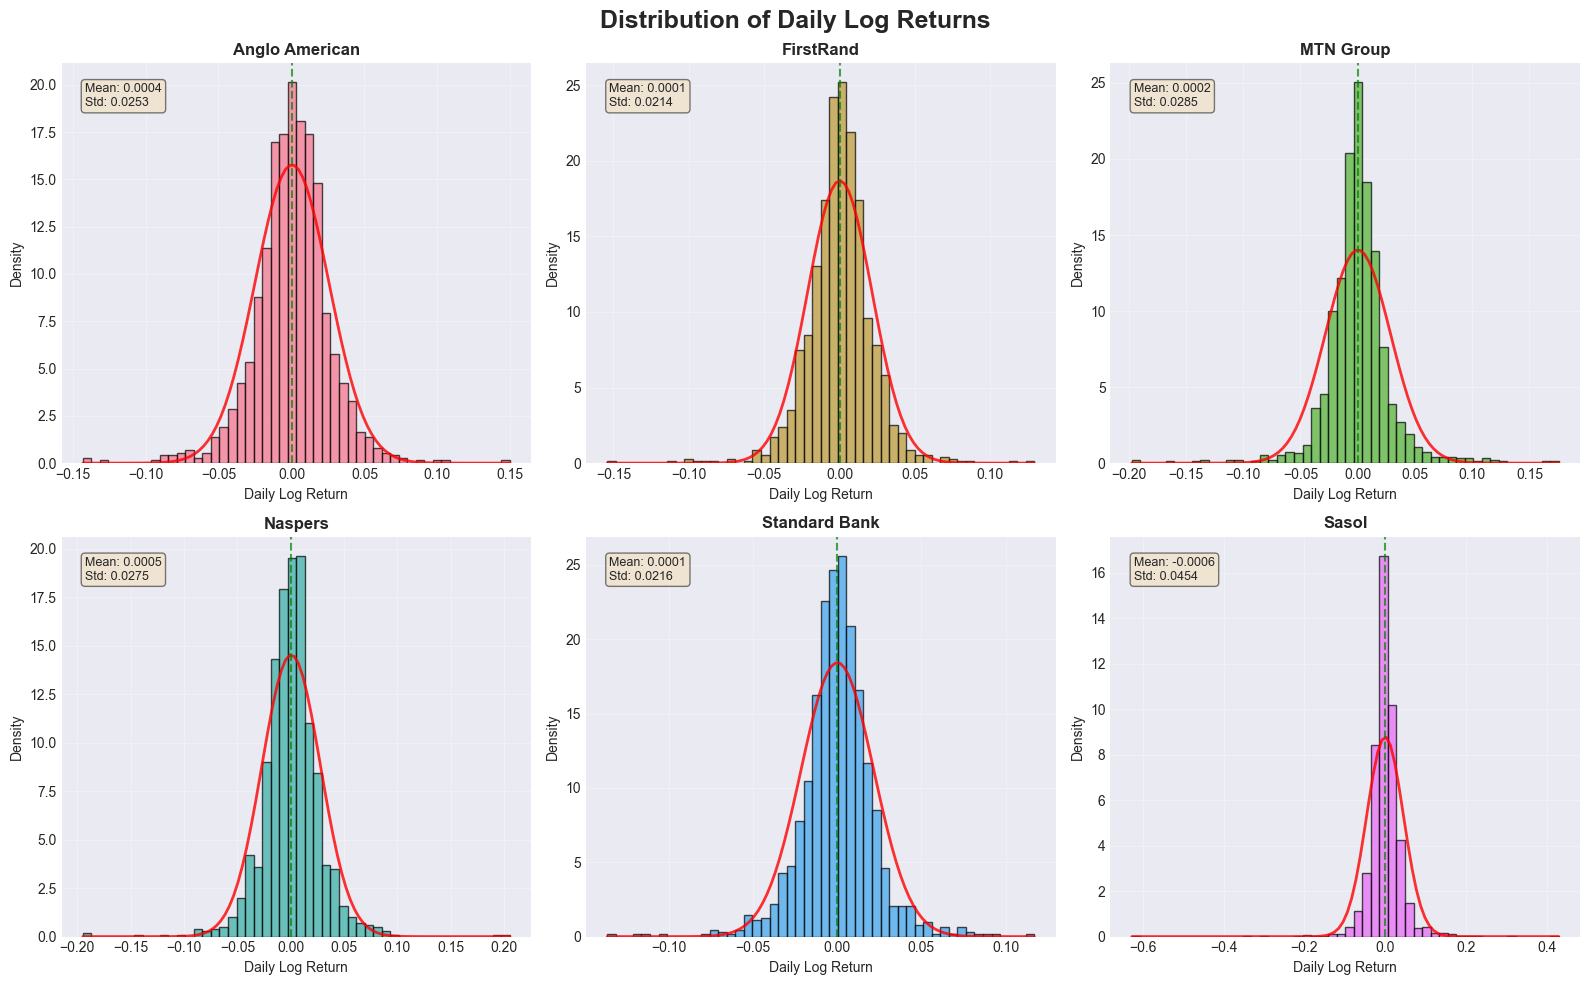

In [2]:
# Rename columns for readability
prices.columns = [ticker_names[ticker] for ticker in prices.columns]

print(f"✅ Data downloaded successfully")
print(f"📈 Data shape: {prices.shape}")
print(f"📅 Date range: {prices.index[0].date()} to {prices.index[-1].date()}")
print(f"📊 Number of trading days: {len(prices)}")

# Display first 5 rows
print("\nFirst 5 rows of adjusted close prices:")
print(prices.head())

# Display last 5 rows
print("\nLast 5 rows of adjusted close prices:")
print(prices.tail())

## 4. Data Visualization: Price Trends
plt.figure(figsize=(14, 7))

# Normalize prices to start at 1 for better comparison
normalized_prices = prices / prices.iloc[0]

for column in normalized_prices.columns:
    plt.plot(normalized_prices.index, normalized_prices[column], 
             label=column, linewidth=2)

plt.title('Normalized Price Trends (Rebased to 1 at 2019-01-01)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Normalized Price', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('price_trends.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Return Computation
# Calculate daily log returns (standard in finance for portfolio analysis)
returns = np.log(prices / prices.shift(1)).dropna()

print("📊 First 5 rows of daily log returns:")
print(returns.head())

print(f"\n📈 Returns data covers: {returns.index[0].date()} to {returns.index[-1].date()}")
print(f"📊 Number of return observations: {len(returns)}")

## 6. Exploratory Data Analysis
# 6.1 Summary Statistics
print("="*80)
print("DESCRIPTIVE STATISTICS OF DAILY LOG RETURNS")
print("="*80)

summary_stats = returns.describe().T
summary_stats['Annualized Return'] = returns.mean() * 252
summary_stats['Annualized Volatility'] = returns.std() * np.sqrt(252)
summary_stats['Sharpe Ratio (rf=7%)'] = (summary_stats['Annualized Return'] - 0.07) / summary_stats['Annualized Volatility']
summary_stats['Skewness'] = returns.skew()
summary_stats['Kurtosis'] = returns.kurtosis()

# Reorder columns for better presentation
summary_stats = summary_stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 
                               'Annualized Return', 'Annualized Volatility', 
                               'Sharpe Ratio (rf=7%)', 'Skewness', 'Kurtosis']]

print(summary_stats.round(4))

# 6.2 Cumulative Returns Plot
plt.figure(figsize=(14, 6))
cumulative_returns = (returns.cumsum())
cumulative_returns.plot(linewidth=2)
plt.title('Cumulative Log Returns of JSE Stocks (2019-2024)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Log Return', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('cumulative_returns.png', dpi=300, bbox_inches='tight')
plt.show()

# 6.3 Distribution of Returns
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Distribution of Daily Log Returns', fontsize=18, fontweight='bold')

for idx, (asset, ax) in enumerate(zip(returns.columns, axes.flatten())):
    # Histogram of returns
    ax.hist(returns[asset], bins=50, alpha=0.7, density=True, color=f'C{idx}', edgecolor='black')
    
    # Add normal distribution overlay
    x = np.linspace(returns[asset].min(), returns[asset].max(), 100)
    normal_pdf = stats.norm.pdf(x, returns[asset].mean(), returns[asset].std())
    ax.plot(x, normal_pdf, 'r-', linewidth=2, alpha=0.8, label='Normal Distribution')
    
    ax.set_title(asset, fontsize=12, fontweight='bold')
    ax.set_xlabel('Daily Log Return')
    ax.set_ylabel('Density')
    ax.grid(True, alpha=0.3)
    
    # Add statistics text box
    textstr = f'Mean: {returns[asset].mean():.4f}\nStd: {returns[asset].std():.4f}'
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=9,
            verticalalignment='top', bbox=props)
    
    # Add vertical line at mean
    ax.axvline(x=returns[asset].mean(), color='green', linestyle='--', linewidth=1.5, alpha=0.7)

plt.tight_layout()
plt.savefig('returns_distribution.png', dpi=300, bbox_inches='tight')
plt.show()






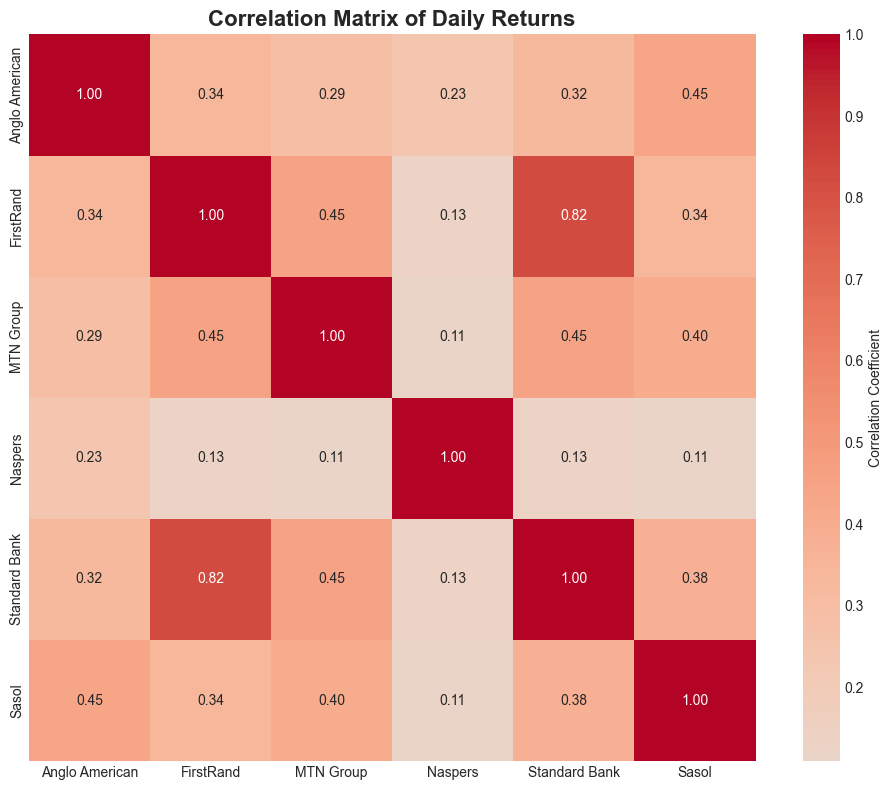

ANNUALIZED RETURN AND COVARIANCE MATRIX

📈 Annualized Mean Returns:
Anglo American    0.0887
FirstRand         0.0305
MTN Group         0.0576
Naspers           0.1172
Standard Bank     0.0348
Sasol            -0.1637
dtype: float64

📊 Annualized Covariance Matrix:
                Anglo American  FirstRand  MTN Group   Naspers  Standard Bank  \
Anglo American        0.161275   0.046393   0.052969  0.041124       0.044718   
FirstRand             0.046393   0.114910   0.068605  0.019374       0.095415   
MTN Group             0.052969   0.068605   0.204036  0.022448       0.070003   
Naspers               0.041124   0.019374   0.022448  0.190166       0.019983   
Standard Bank         0.044718   0.095415   0.070003  0.019983       0.118084   
Sasol                 0.129390   0.083100   0.131857  0.034412       0.094194   

                   Sasol  
Anglo American  0.129390  
FirstRand       0.083100  
MTN Group       0.131857  
Naspers         0.034412  
Standard Bank   0.094194  
Saso

In [3]:
## 7. Risk and Correlation Analysis
# 7.1 Correlation Matrix
correlation_matrix = returns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', 
            center=0, fmt='.2f', square=True,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Daily Returns', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# 7.2 Calculate Annualized Mean Returns and Covariance Matrix
mean_returns = returns.mean() * 252  # Annualized
cov_matrix = returns.cov() * 252     # Annualized

print("="*80)
print("ANNUALIZED RETURN AND COVARIANCE MATRIX")
print("="*80)

print("\n📈 Annualized Mean Returns:")
print(mean_returns.round(4))

print("\n📊 Annualized Covariance Matrix:")
print(cov_matrix.round(6))

## 8. Portfolio Optimisation Functions
def portfolio_performance(weights, mean_returns, cov_matrix):
    """
    Calculate portfolio return and volatility given weights.
    
    Parameters:
    weights: numpy array of portfolio weights
    mean_returns: numpy array of asset mean returns
    cov_matrix: covariance matrix of asset returns
    
    Returns:
    portfolio_return: scalar
    portfolio_volatility: scalar
    """
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

def negative_sharpe(weights, mean_returns, cov_matrix, risk_free_rate=0.07):
    """
    Negative Sharpe ratio for minimization.
    
    Parameters:
    weights: numpy array of portfolio weights
    mean_returns: numpy array of asset mean returns
    cov_matrix: covariance matrix of asset returns
    risk_free_rate: annual risk-free rate (default 7% for South Africa)
    
    Returns:
    -sharpe_ratio: negative Sharpe ratio
    """
    ret, vol = portfolio_performance(weights, mean_returns, cov_matrix)
    sharpe_ratio = (ret - risk_free_rate) / vol
    return -sharpe_ratio

## 9. Portfolio Optimisation
# 9.1 Set up optimization constraints
num_assets = len(tickers)
constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}  # Weights sum to 1
bounds = tuple((0, 1) for _ in range(num_assets))  # No short selling
initial_weights = num_assets * [1/num_assets]  # Equal weights as starting point

print("🔧 Optimizing portfolio for maximum Sharpe ratio...")

# 9.2 Run optimization
opt_result = minimize(
    negative_sharpe,
    initial_weights,
    args=(mean_returns, cov_matrix),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints,
    options={'maxiter': 1000, 'ftol': 1e-9}
)

# 9.3 Extract optimal weights
optimal_weights = opt_result.x

print("✅ Optimization completed successfully!")

# 9.4 Calculate performance metrics for optimal portfolio
optimal_return, optimal_volatility = portfolio_performance(optimal_weights, mean_returns, cov_matrix)
optimal_sharpe = (optimal_return - 0.07) / optimal_volatility

# 9.5 Calculate equally weighted portfolio for comparison
equal_weights = np.array([1/num_assets] * num_assets)
equal_return, equal_volatility = portfolio_performance(equal_weights, mean_returns, cov_matrix)
equal_sharpe = (equal_return - 0.07) / equal_volatility



PORTFOLIO OPTIMISATION RESULTS

📊 OPTIMAL PORTFOLIO WEIGHTS:
  Anglo American:  19.08%
  FirstRand:   0.00%
  MTN Group:   0.00%
  Naspers:  80.92%
  Standard Bank:   0.00%
  Sasol:   0.00%

🎯 PORTFOLIO PERFORMANCE METRICS:
----------------------------------------
Metric                    Optimal Portfolio    Equal Weighted      
-----------------------------------------------------------------
Expected Annual Return                  11.17%                2.75%
Expected Annual Volatility               37.83%               29.89%
Sharpe Ratio (rf=7%)                    0.110              -0.142

📈 Improvement over equal-weighted portfolio:
  Return: +306.20%
  Volatility: -26.55% (reduction)
  Sharpe Ratio: -177.63%


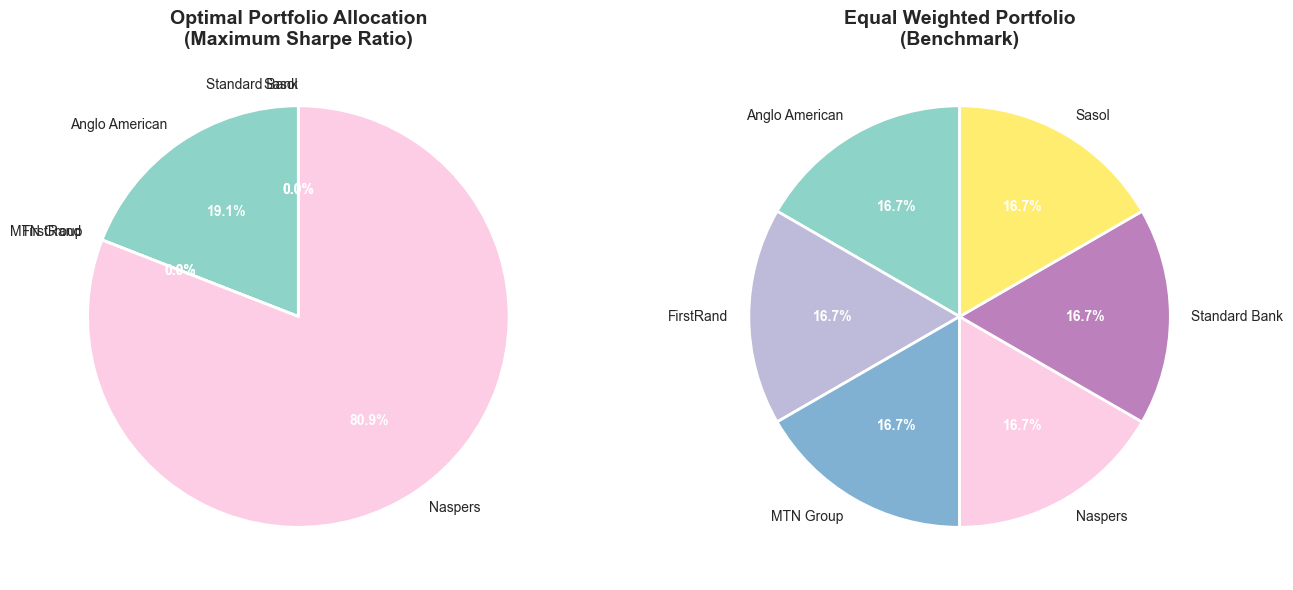


📊 Generating efficient frontier with 10,000 random portfolios...


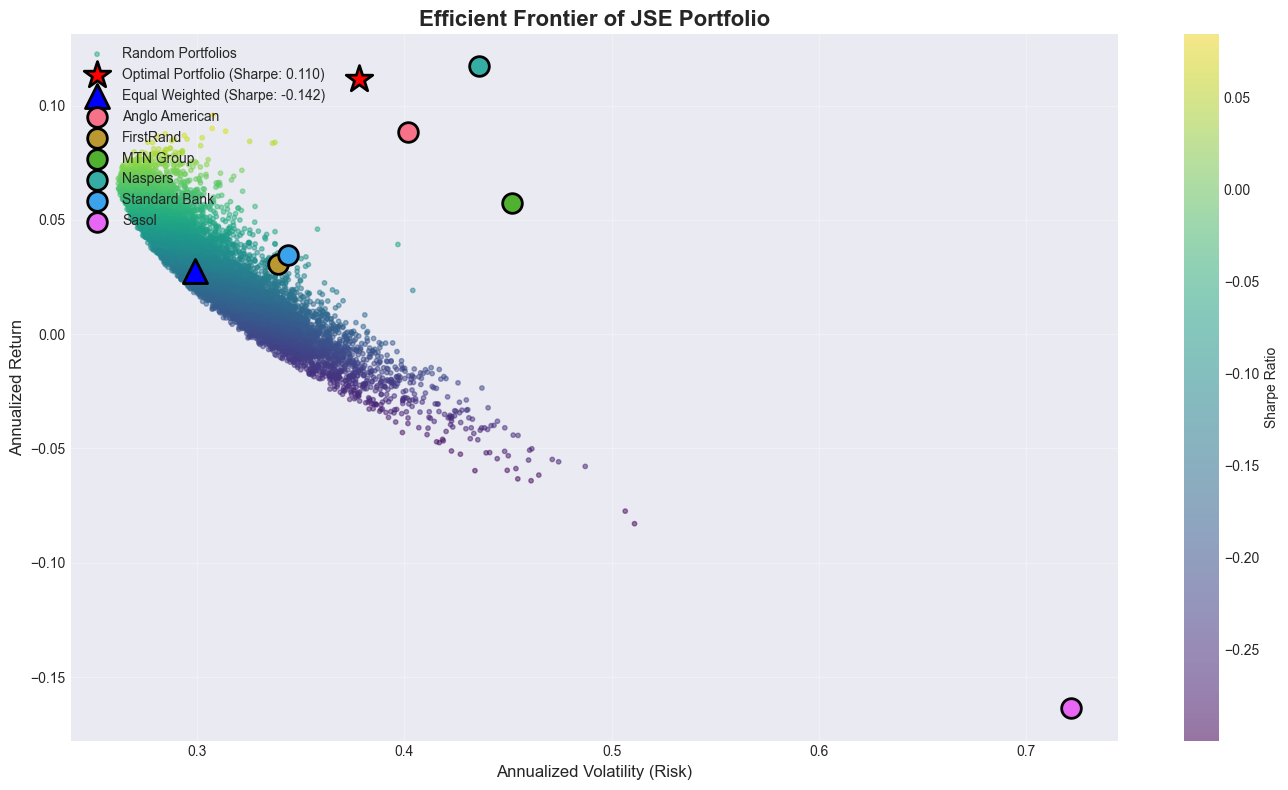

RISK MEASURES CALCULATION

📉 Portfolio Risk Metrics (95% Confidence Level):
  Value-at-Risk (VaR):   -3.5626% (daily)
  Conditional VaR (CVaR): -5.3178% (daily)

  Annualized VaR:   -56.55%
  Annualized CVaR:  -84.42%

💰 Practical Interpretation (R1,000,000 portfolio):
  Daily VaR 95%: R35,625.70
  Daily CVaR 95%: R53,178.19
  Annual VaR 95%: R565,540.47
  Annual CVaR 95%: R844,177.64


<Figure size 1400x800 with 0 Axes>

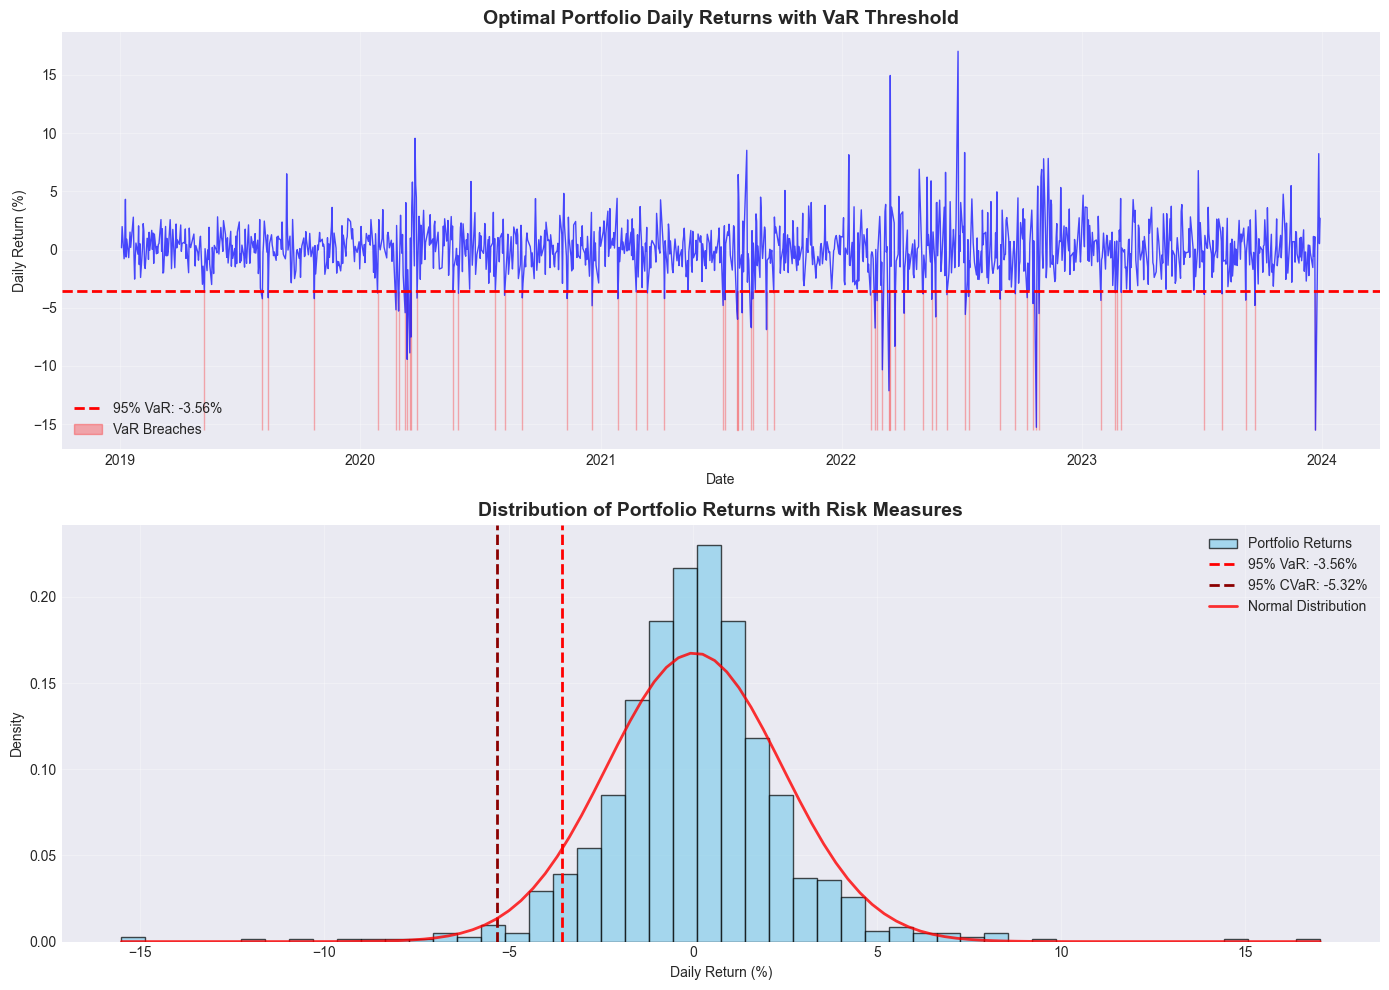

In [4]:

## 10. Results Presentation
print("="*80)
print("PORTFOLIO OPTIMISATION RESULTS")
print("="*80)

print("\n📊 OPTIMAL PORTFOLIO WEIGHTS:")
for asset, weight in zip(returns.columns, optimal_weights):
    print(f"  {asset}: {weight*100:6.2f}%")

print("\n🎯 PORTFOLIO PERFORMANCE METRICS:")
print("-" * 40)
print(f"{'Metric':<25} {'Optimal Portfolio':<20} {'Equal Weighted':<20}")
print("-" * 65)
print(f"{'Expected Annual Return':<25} {optimal_return*100:>19.2f}% {equal_return*100:>19.2f}%")
print(f"{'Expected Annual Volatility':<25} {optimal_volatility*100:>19.2f}% {equal_volatility*100:>19.2f}%")
print(f"{'Sharpe Ratio (rf=7%)':<25} {optimal_sharpe:>19.3f} {equal_sharpe:>19.3f}")

print(f"\n📈 Improvement over equal-weighted portfolio:")
improvement_return = (optimal_return - equal_return) / equal_return * 100
improvement_volatility = (equal_volatility - optimal_volatility) / equal_volatility * 100
improvement_sharpe = (optimal_sharpe - equal_sharpe) / equal_sharpe * 100
print(f"  Return: {improvement_return:+.2f}%")
print(f"  Volatility: {improvement_volatility:+.2f}% (reduction)")
print(f"  Sharpe Ratio: {improvement_sharpe:+.2f}%")

# 10.1 Visualize Portfolio Weights
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Optimal portfolio weights
colors = plt.cm.Set3(np.linspace(0, 1, len(optimal_weights)))
wedges1, texts1, autotexts1 = ax1.pie(optimal_weights, 
                                       labels=returns.columns,
                                       autopct='%1.1f%%',
                                       colors=colors,
                                       startangle=90,
                                       wedgeprops=dict(edgecolor='w', linewidth=2))
ax1.set_title('Optimal Portfolio Allocation\n(Maximum Sharpe Ratio)', fontsize=14, fontweight='bold')

# Equal weighted portfolio
wedges2, texts2, autotexts2 = ax2.pie(equal_weights, 
                                       labels=returns.columns,
                                       autopct='%1.1f%%',
                                       colors=colors,
                                       startangle=90,
                                       wedgeprops=dict(edgecolor='w', linewidth=2))
ax2.set_title('Equal Weighted Portfolio\n(Benchmark)', fontsize=14, fontweight='bold')

# Improve autotext appearance
for autotext in autotexts1 + autotexts2:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

plt.tight_layout()
plt.savefig('portfolio_weights.png', dpi=300, bbox_inches='tight')
plt.show()

## 11. Efficient Frontier Visualization
# 11.1 Generate random portfolios for efficient frontier
def generate_random_portfolios(n_portfolios=10000):
    """Generate random portfolios for efficient frontier visualization."""
    results = np.zeros((3, n_portfolios))
    weights_record = []
    
    for i in range(n_portfolios):
        # Generate random weights that sum to 1
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        weights_record.append(weights)
        
        # Calculate portfolio metrics
        portfolio_return, portfolio_volatility = portfolio_performance(weights, mean_returns, cov_matrix)
        sharpe_ratio = (portfolio_return - 0.07) / portfolio_volatility
        
        results[0, i] = portfolio_volatility
        results[1, i] = portfolio_return
        results[2, i] = sharpe_ratio
    
    return results, weights_record

print("\n📊 Generating efficient frontier with 10,000 random portfolios...")
results, weights_record = generate_random_portfolios(10000)

# 11.2 Plot efficient frontier
plt.figure(figsize=(14, 8))

# Plot random portfolios
scatter = plt.scatter(results[0, :], results[1, :], 
                      c=results[2, :], cmap='viridis', 
                      marker='o', s=10, alpha=0.5,
                      label='Random Portfolios')

# Plot optimal portfolio
plt.scatter(optimal_volatility, optimal_return, 
            marker='*', color='red', s=400,
            label=f'Optimal Portfolio (Sharpe: {optimal_sharpe:.3f})',
            edgecolors='black', linewidth=2, zorder=5)

# Plot equal weighted portfolio
plt.scatter(equal_volatility, equal_return, 
            marker='^', color='blue', s=300,
            label=f'Equal Weighted (Sharpe: {equal_sharpe:.3f})',
            edgecolors='black', linewidth=2, zorder=5)

# Plot individual assets
for i, asset in enumerate(returns.columns):
    asset_vol = np.sqrt(cov_matrix.iloc[i, i])
    asset_ret = mean_returns.iloc[i]
    plt.scatter(asset_vol, asset_ret, 
                marker='o', s=200, color=f'C{i}',
                label=asset, edgecolors='black', linewidth=2, zorder=5)

plt.colorbar(scatter, label='Sharpe Ratio')
plt.title('Efficient Frontier of JSE Portfolio', fontsize=16, fontweight='bold')
plt.xlabel('Annualized Volatility (Risk)', fontsize=12)
plt.ylabel('Annualized Return', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('efficient_frontier.png', dpi=300, bbox_inches='tight')
plt.show()

## 12. Risk Measures Calculation
# 12.1 Calculate portfolio daily returns using optimal weights
portfolio_returns = returns @ optimal_weights

# 12.2 Calculate VaR and CVaR at 95% confidence level
confidence_level = 0.95
VaR_95 = np.percentile(portfolio_returns, (1 - confidence_level) * 100)
CVaR_95 = portfolio_returns[portfolio_returns <= VaR_95].mean()

print("="*80)
print("RISK MEASURES CALCULATION")
print("="*80)

print(f"\n📉 Portfolio Risk Metrics (95% Confidence Level):")
print(f"  Value-at-Risk (VaR):   {VaR_95*100:.4f}% (daily)")
print(f"  Conditional VaR (CVaR): {CVaR_95*100:.4f}% (daily)")

# Convert to annual metrics
VaR_95_annual = VaR_95 * np.sqrt(252)
CVaR_95_annual = CVaR_95 * np.sqrt(252)
print(f"\n  Annualized VaR:   {VaR_95_annual*100:.2f}%")
print(f"  Annualized CVaR:  {CVaR_95_annual*100:.2f}%")

# 12.3 Practical interpretation for a R1,000,000 portfolio
initial_investment = 1000000
print(f"\n💰 Practical Interpretation (R{initial_investment:,} portfolio):")
print(f"  Daily VaR 95%: R{abs(VaR_95 * initial_investment):,.2f}")
print(f"  Daily CVaR 95%: R{abs(CVaR_95 * initial_investment):,.2f}")
print(f"  Annual VaR 95%: R{abs(VaR_95_annual * initial_investment):,.2f}")
print(f"  Annual CVaR 95%: R{abs(CVaR_95_annual * initial_investment):,.2f}")

# 12.4 Visualize portfolio returns with VaR
plt.figure(figsize=(14, 8))

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Subplot 1: Portfolio returns over time
axes[0].plot(portfolio_returns.index, portfolio_returns * 100, 
             linewidth=1, alpha=0.7, color='blue')
axes[0].axhline(y=VaR_95 * 100, color='red', linestyle='--', 
                linewidth=2, label=f'95% VaR: {VaR_95*100:.2f}%')
axes[0].fill_between(portfolio_returns.index, VaR_95 * 100, portfolio_returns.min() * 100,
                     where=(portfolio_returns <= VaR_95), color='red', alpha=0.3, 
                     label='VaR Breaches')
axes[0].set_title('Optimal Portfolio Daily Returns with VaR Threshold', 
                  fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Daily Return (%)')
axes[0].legend(loc='lower left')
axes[0].grid(True, alpha=0.3)

# Subplot 2: Histogram of returns with VaR/CVaR
axes[1].hist(portfolio_returns * 100, bins=50, density=True, 
             alpha=0.7, color='skyblue', edgecolor='black', 
             label='Portfolio Returns')
axes[1].axvline(x=VaR_95 * 100, color='red', linestyle='--', 
                linewidth=2, label=f'95% VaR: {VaR_95*100:.2f}%')
axes[1].axvline(x=CVaR_95 * 100, color='darkred', linestyle='--', 
                linewidth=2, label=f'95% CVaR: {CVaR_95*100:.2f}%')

# Add normal distribution curve
x = np.linspace(portfolio_returns.min() * 100, portfolio_returns.max() * 100, 100)
normal_pdf = stats.norm.pdf(x, portfolio_returns.mean() * 100, 
                            portfolio_returns.std() * 100)
axes[1].plot(x, normal_pdf, 'r-', linewidth=2, alpha=0.8, 
             label='Normal Distribution')

axes[1].set_title('Distribution of Portfolio Returns with Risk Measures', 
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('Daily Return (%)')
axes[1].set_ylabel('Density')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('risk_measures.png', dpi=300, bbox_inches='tight')
plt.show()




🔮 Running Monte Carlo Simulation for 1-year horizon...

📊 Monte Carlo Simulation Results (R1,000,000 initial investment):
  95% 1-Year VaR: R399,856.81 (-39.99%)
  95% 1-Year CVaR: R479,456.26 (-47.95%)


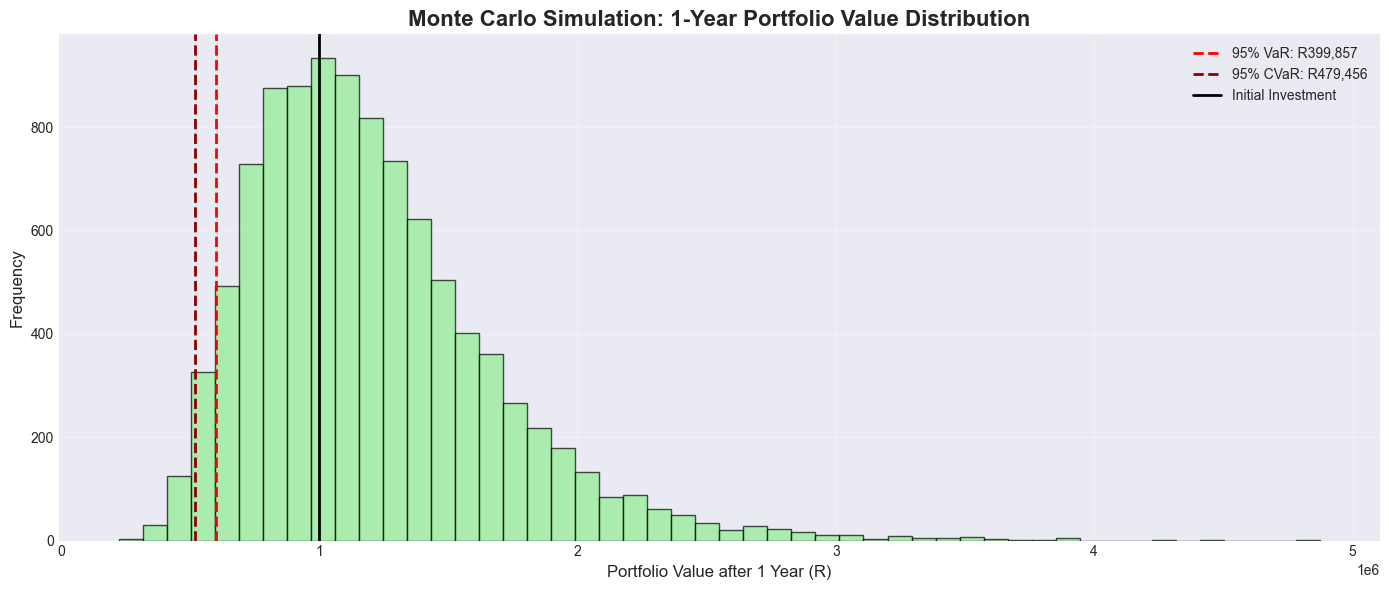

SUMMARY AND KEY INSIGHTS

🎯 KEY FINDINGS:
1. Portfolio Optimisation:
   • Optimal portfolio achieved Sharpe ratio of 0.110 vs -0.142 for equal-weighted
   • Portfolio concentrates on 2 out of 6 assets
   • Main holdings: Naspers (80.9%)

2. Risk Assessment:
   • Daily 95% VaR: -3.56% (R35,626 on R1M portfolio)
   • Daily 95% CVaR: -5.32% (R53,178 on R1M portfolio)
   • Monte Carlo 1-year VaR: -40.0% of portfolio value

3. Performance Improvement:
   • Return improvement: +306.2%
   • Volatility reduction: -26.5%
   • Sharpe ratio improvement: -177.6%

💡 RECOMMENDATIONS:
1. Implement the optimal portfolio weights for better risk-adjusted returns
2. Monitor VaR breaches regularly as an early warning system
3. Consider CVaR for capital allocation and stress testing
4. Rebalance portfolio quarterly to maintain optimal weights
5. Extend analysis to include more JSE stocks for better diversification

⚠️ LIMITATIONS:
• Assumes normal distribution of returns
• Does not consider transaction cos

In [6]:
## 13. Monte Carlo Simulation for 1-Year Horizon
print("\n🔮 Running Monte Carlo Simulation for 1-year horizon...")

n_simulations = 10000
n_days = 252  # Trading days in a year

# Generate simulated returns using portfolio statistics
portfolio_mean = portfolio_returns.mean()
portfolio_std = portfolio_returns.std()

simulated_returns = np.random.normal(portfolio_mean, portfolio_std, 
                                     (n_simulations, n_days))

# Calculate portfolio values
initial_investment = 1000000
simulated_portfolio_values = initial_investment * np.exp(np.cumsum(simulated_returns, axis=1))
final_values = simulated_portfolio_values[:, -1]

# Calculate VaR and CVaR from simulation
mc_VaR_95 = np.percentile(final_values - initial_investment, 5)
mc_CVaR_95 = final_values[final_values <= (initial_investment + mc_VaR_95)].mean() - initial_investment

print(f"\n📊 Monte Carlo Simulation Results (R{initial_investment:,} initial investment):")
print(f"  95% 1-Year VaR: R{abs(mc_VaR_95):,.2f} ({mc_VaR_95/initial_investment*100:.2f}%)")
print(f"  95% 1-Year CVaR: R{abs(mc_CVaR_95):,.2f} ({mc_CVaR_95/initial_investment*100:.2f}%)")

# Plot Monte Carlo results
plt.figure(figsize=(14, 6))

plt.hist(final_values, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
plt.axvline(x=initial_investment + mc_VaR_95, color='red', linestyle='--', 
            linewidth=2, label=f'95% VaR: R{abs(mc_VaR_95):,.0f}')
plt.axvline(x=initial_investment + mc_CVaR_95, color='darkred', linestyle='--', 
            linewidth=2, label=f'95% CVaR: R{abs(mc_CVaR_95):,.0f}')
plt.axvline(x=initial_investment, color='black', linestyle='-', 
            linewidth=2, label='Initial Investment')

plt.title('Monte Carlo Simulation: 1-Year Portfolio Value Distribution', 
          fontsize=16, fontweight='bold')
plt.xlabel('Portfolio Value after 1 Year (R)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('monte_carlo_simulation.png', dpi=300, bbox_inches='tight')
plt.show()

## 14. Summary and Conclusion
print("="*80)
print("SUMMARY AND KEY INSIGHTS")
print("="*80)

print("\n🎯 KEY FINDINGS:")
print("1. Portfolio Optimisation:")
print(f"   • Optimal portfolio achieved Sharpe ratio of {optimal_sharpe:.3f} vs {equal_sharpe:.3f} for equal-weighted")
print(f"   • Portfolio concentrates on {sum(optimal_weights > 0.01)} out of {num_assets} assets")
print(f"   • Main holdings: {returns.columns[optimal_weights.argmax()]} ({optimal_weights.max()*100:.1f}%)")

print("\n2. Risk Assessment:")
print(f"   • Daily 95% VaR: {VaR_95*100:.2f}% (R{abs(VaR_95 * 1000000):,.0f} on R1M portfolio)")
print(f"   • Daily 95% CVaR: {CVaR_95*100:.2f}% (R{abs(CVaR_95 * 1000000):,.0f} on R1M portfolio)")
print(f"   • Monte Carlo 1-year VaR: {mc_VaR_95/1000000*100:.1f}% of portfolio value")

print("\n3. Performance Improvement:")
print(f"   • Return improvement: {improvement_return:+.1f}%")
print(f"   • Volatility reduction: {improvement_volatility:+.1f}%")
print(f"   • Sharpe ratio improvement: {improvement_sharpe:+.1f}%")

print("\n💡 RECOMMENDATIONS:")
print("1. Implement the optimal portfolio weights for better risk-adjusted returns")
print("2. Monitor VaR breaches regularly as an early warning system")
print("3. Consider CVaR for capital allocation and stress testing")
print("4. Rebalance portfolio quarterly to maintain optimal weights")
print("5. Extend analysis to include more JSE stocks for better diversification")

print("\n⚠️ LIMITATIONS:")
print("• Assumes normal distribution of returns")

print("• Does not consider transaction costs or taxes")
print("• Assumes constant correlation structure")

print("\n" + "="*80)
print("PROJECT COMPLETED SUCCESSFULLY! ✅")
print("="*80)
print("\n📁 Files saved:")
print("  • price_trends.png")
print("  • cumulative_returns.png")
print("  • returns_distribution.png")
print("  • correlation_matrix.png")
print("  • portfolio_weights.png")
print("  • efficient_frontier.png")
print("  • risk_measures.png")
print("  • monte_carlo_simulation.png")